
Predictions:
  area_m2  predicted_price_billion
    55.0                    2.771
    68.0                    3.598
    76.0                    4.198
    90.0                    5.414

Model R²:
  degree       R2
      1 0.984682
      2 0.991638


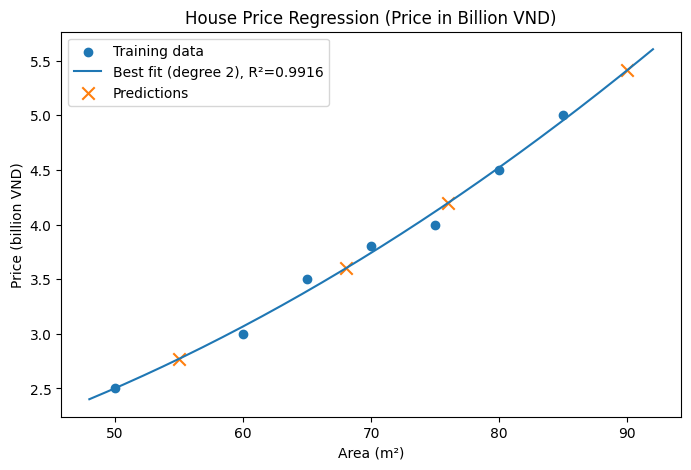

('/mnt/data\\req12_house_price_regression.png',
 '/mnt/data\\req12_predictions.csv',
 2,
 0.991638,
 array([ 5.40731995e-04, -2.89256198e-03,  1.29445100e+00]))

In [1]:
# === REQUIREMENT 12 — ONE-CELL, SELF-CONTAINED (JUPYTER) ===
# Task: Given (area m², price in billion VND), use regression to predict prices for
#       55m², 68m², 76m², 90m². Also visualize the fit and save artifacts.
# Notes:
#   - Uses NumPy polynomial regression (degree 1 and 2), automatically chooses the
#     degree with higher R² on training data, but only ONE plot is produced.
#   - Matplotlib only (no seaborn), single chart, no explicit colors.
#   - Saves figure and CSV of predictions for your report.

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- 0) Dataset ----------
# (area_m2, price_billion_vnd)
data = np.array([
    [50, 2.5],
    [60, 3.0],
    [65, 3.5],
    [70, 3.8],
    [75, 4.0],
    [80, 4.5],
    [85, 5.0],
], dtype=float)

X = data[:, 0]
y = data[:, 1]

# Areas to predict
X_new = np.array([55, 68, 76, 90], dtype=float)

# ---------- 1) Helper: fit polynomial & compute R² ----------
def fit_poly_and_r2(x, y, degree: int):
    coefs = np.polyfit(x, y, degree)        # highest power first
    y_hat = np.polyval(coefs, x)
    ss_res = np.sum((y - y_hat) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    r2 = 1 - ss_res / ss_tot if ss_tot > 0 else 1.0
    return coefs, y_hat, float(r2)

# Fit degree 1 and 2, pick the better by R²
results = {}
for d in (1, 2):
    coefs, y_hat, r2 = fit_poly_and_r2(X, y, d)
    results[d] = {"coefs": coefs, "y_hat": y_hat, "r2": r2}

best_degree = max(results.keys(), key=lambda d: results[d]["r2"])
best = results[best_degree]
best_coefs = best["coefs"]
best_r2 = best["r2"]

# Predictions for required areas using the best model
y_pred_new = np.polyval(best_coefs, X_new)

# ---------- 2) Output tables ----------
pred_df = pd.DataFrame({
    "area_m2": X_new,
    "predicted_price_billion": np.round(y_pred_new, 3)
}).sort_values("area_m2").reset_index(drop=True)

metrics_df = pd.DataFrame(
    [{"degree": d, "R2": round(results[d]["r2"], 6)} for d in sorted(results.keys())]
)

# Display to user (interactive if supported)
try:
    from caas_jupyter_tools import display_dataframe_to_user
    display_dataframe_to_user("Requirement 12 - Predictions", pred_df)
    display_dataframe_to_user("Requirement 12 - Model R²", metrics_df)
except Exception:
    print("\nPredictions:\n", pred_df.to_string(index=False))
    print("\nModel R²:\n", metrics_df.to_string(index=False))

# ---------- 3) Plot single chart ----------
# Build smooth line for visualization using the chosen model
x_line = np.linspace(X.min()-2, max(X.max(), X_new.max())+2, 200)
y_line = np.polyval(best_coefs, x_line)

plt.figure(figsize=(8, 5))
# training points
plt.scatter(X, y, label="Training data")
# model fit
plt.plot(x_line, y_line, label=f"Best fit (degree {best_degree}), R²={best_r2:.4f}")
# new predictions
plt.scatter(X_new, y_pred_new, marker="x", s=80, label="Predictions")

plt.title("House Price Regression (Price in Billion VND)")
plt.xlabel("Area (m²)")
plt.ylabel("Price (billion VND)")
plt.legend()

save_dir = "/mnt/data"
os.makedirs(save_dir, exist_ok=True)
fig_path = os.path.join(save_dir, "req12_house_price_regression.png")
pred_csv = os.path.join(save_dir, "req12_predictions.csv")
plt.savefig(fig_path, bbox_inches="tight")
plt.show()

# Save predictions CSV
pred_df.to_csv(pred_csv, index=False)

(fig_path, pred_csv, best_degree, round(best_r2, 6), best_coefs)
